 # **Airbnb New User Bookings

- <b>Problem statement:
    
Airbnb New User Booking is a kaggle challenge to predict which country a user is likely to book as his or her travel destination based on the data which the user has entered themselves when creating the account or based on the past travels. We need to predict 5 travel destinations for each user. This is a multiclass classification problem i.e how probable a user is going to all the 5 destinations rather than just one.

- <b> objective:
    
    To predict the top 5 travel destinations in decreasing order of their relevance
- <b> Dataset-- 
    - train_users.csv
    There are 16 features for describing each user in the dataset:
        - ID
        - Date_account_created
        - Timestamp_first_active
        - Date_first_booking
        - Gender
        - Age
        - Signup_method
        - Signup_flow
        - Language
        - First_affiliate_tracked
        - Affiliate_channel
        - Affiliate_provider
        - Signup_app
        - First_device_type
        - Country_destination
    
    - Sessions.csv
        - User_id
        - Action
        - Action_type
        - Action_detail
        - Device_type
        - Secs_elapsed
    
    - Age_Gender_Bkts.csv
        - Age_bucket
        - Country_destination
        - Gender
        - Population in thousands
        - Year
        
    - Countries.csv
        - Country_destination
        - Lat_destination
        - Lng_destination
        - Distance_km
        - Distance_km2
        - Destination_language
        - Language_levensthein_distance

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

 - The first step here will be load all the given data into a dataframe to extract all the basic information such as the variations in the values, null values, size of the data, etc.


### Age_Gender

In [2]:
# used pandas to read the the csv file using the read_csv function which is stored as a dataframe in the df_age variable.
df_age = pd.read_csv('age_gender_bkts.csv/age_gender_bkts.csv')

In [3]:
#df_age is a dataframe and we use head function to display the top 5 rows of the datafram
df_age.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


In [4]:
#Check for null values
df_age[df_age['year'].isnull()]

,age_bucket,country_destination,gender,population_in_thousands,year


- From the above cell it is clear that there is no null values present in this feature.
- Now we will deal the age feature here 100+ will be converted to into a bucket and then the buckets will be converted into their mean values as it will increase the versatality as it may be needed for categorical features.

In [5]:
# since the age has a value of 100+ and other values are in bucket form we use the apply function of the data frame link:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
# In the apply function we are using lambda function to perform our calculation to save space link- https://www.w3schools.com/python/python_lambda.asp
df_age['age_bucket'] = df_age['age_bucket'].apply(lambda x:'100-104' if x =='100+' else x)

In [6]:
df_age.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100-104,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


In [7]:
#we are calculating the mean age of the age_bucket
df_age['mean_age'] = df_age['age_bucket'].apply(lambda x: (int(x.split('-')[0])+ int(x.split('-')[1]))/2)

In [8]:
df_age.head()

,age_bucket,country_destination,gender,population_in_thousands,year,mean_age
0,100-104,AU,male,1.0,2015.0,102.0
1,95-99,AU,male,9.0,2015.0,97.0
2,90-94,AU,male,47.0,2015.0,92.0
3,85-89,AU,male,118.0,2015.0,87.0
4,80-84,AU,male,199.0,2015.0,82.0


In [9]:
# this displays the unique value of the feature column'year'
df_age['year'].unique()

array([2015.])

There is only one year value which doesn't add much information about the data available. So this column can be removed

In [10]:
#since there isn't any variation in the value so we are dropping the particular columns
df_age.drop('year',axis=1,inplace=True)

In [11]:
#unique values of the feature column 'country_destination'
df_age['country_destination'].unique()

array(['AU', 'CA', 'DE', 'ES', 'FR', 'GB', 'IT', 'NL', 'PT', 'US'],
      dtype=object)

The number of countries represented here are very less and very less value can be drawn from this so let us get some more insight from the following plots

Text(0.5, 1.0, 'Age_bucket vs Population')

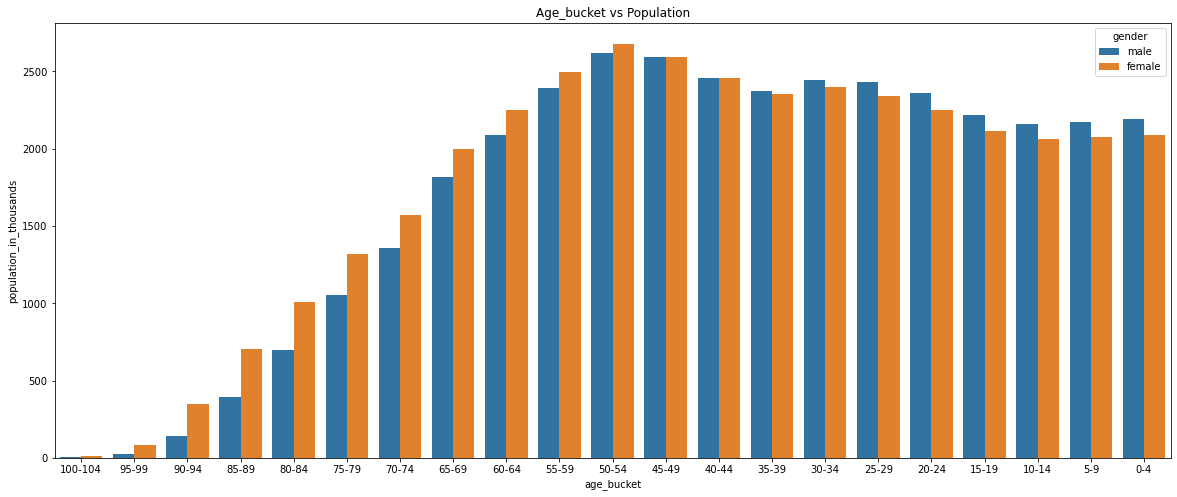

In [12]:
# seaborn barplot - link-https://seaborn.pydata.org/generated/seaborn.barplot.html.
# default arguments - seaborn.barplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x105c7d9e0>, ci=95, n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)
plt.figure(figsize=(20,8))
sns.barplot(x='age_bucket',y='population_in_thousands',hue='gender',data=df_age,ci=None)
plt.title('Age_bucket vs Population')

### Observations:
    - The age group between 50-54 and 45-49 form the largest groups
    - male to female ration is pretty even for the middle aged and the younger population but tends to be more skewed as the age bucket values increase i.e women tend to live longer than men.

Text(0.5, 1.0, 'Destination vs population_in_thousands')

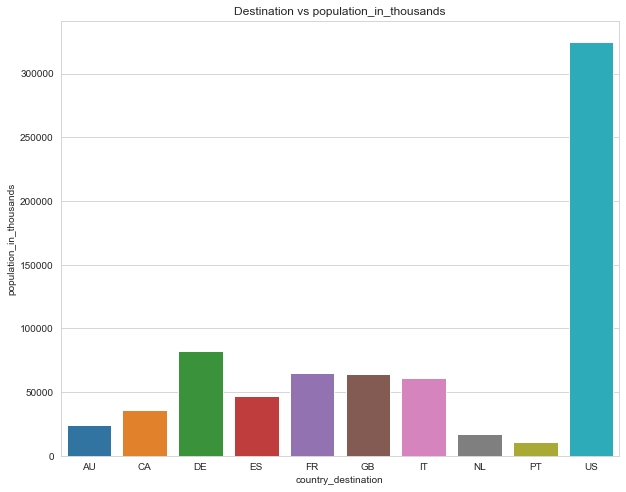

In [13]:
# seaborn barplot - link-https://seaborn.pydata.org/generated/seaborn.barplot.html.
# default arguments - seaborn.barplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x105c7d9e0>, ci=95, n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)
#with sns.set_style we are controlling the figure asthetics more here- https://seaborn.pydata.org/tutorial/aesthetics.html.
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
# we are grouping the data based on the country destination link- https://www.geeksforgeeks.org/python-pandas-dataframe-groupby.
df = df_age.groupby('country_destination')['population_in_thousands'].sum()
sns.barplot(x=df.index,y=df)
plt.title('Destination vs population_in_thousands')

It is very clear from the above graph that US is the most populated destination countries and the remaining countries have a population of less than 100 million.

## Country Statistics

In [14]:
df_country = pd.read_csv("countries.csv/countries.csv")

In [15]:
# displays the top 5 rows of the dataframe.
df_country.head()

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06


In [16]:
# this displays the entire dataframe
df_country

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


In [17]:
#Displays the unique values of the country_destination feature
df_country['country_destination'].unique()

array(['AU', 'CA', 'DE', 'ES', 'FR', 'GB', 'IT', 'NL', 'PT', 'US'],
      dtype=object)

In [18]:
#Series.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)[source]
#Return a Series containing counts of unique values.
#link-https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html#:~:text=Return%20a%20Series%20containing%20counts,Excludes%20NA%20values%20by%20default.
df_train['country_destination'].value_counts()
df_country['country_destination'].value_counts()

DE    1
FR    1
PT    1
ES    1
AU    1
GB    1
NL    1
US    1
CA    1
IT    1
Name: country_destination, dtype: int64

Text(0.5, 1.0, 'Destination vs distance')

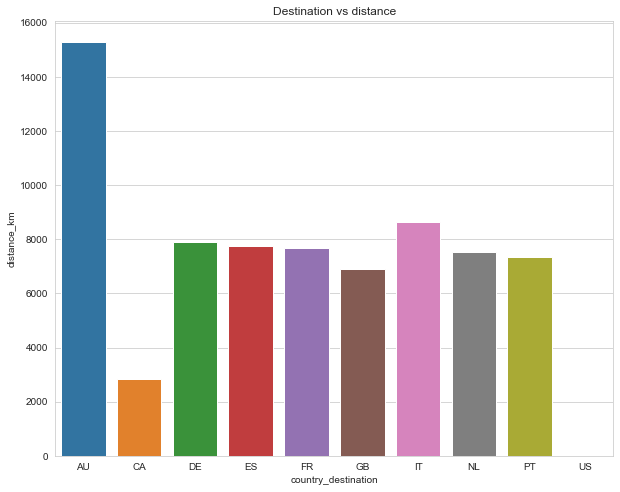

In [19]:
# seaborn barplot - link-https://seaborn.pydata.org/generated/seaborn.barplot.html.
# default arguments - seaborn.barplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x105c7d9e0>, ci=95, n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)
#with sns.set_style we are controlling the figure asthetics more here- https://seaborn.pydata.org/tutorial/aesthetics.html.
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.barplot(x='country_destination',y='distance_km',data=df_country)
plt.title('Destination vs distance')

Bar chart describes the distance of the destination country distance from the source country(country from where the booking was done)

To get a better understanding of the corelation between a popularity of a country and language and distance from the origin of booking to its size we  will be using a joint plot.

In [20]:
df_train = pd.read_csv('train_users_2.csv/train_users_2.csv')

In [21]:
df_train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [22]:
#Series.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)[source]
#Return a Series containing counts of unique values.
#link-https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html#:~:text=Return%20a%20Series%20containing%20counts,Excludes%20NA%20values%20by%20default.
df_train['country_destination'].value_counts()

NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64

In [23]:
# Here we are removing the values which contain the value NDF and Other from the column'country_destination and then again calculating the value_counts so that there is no discripency
popularity = df_train[(df_train['country_destination']!='NDF')&(df_train['country_destination']!='other')]['country_destination'].value_counts()

In [24]:
#Here in the following three cells creating a data frame by taking the values of the column'distance_km','language_levenshtein_distance','destination_km2',
# and setting the 'country_destination' as the index.
dest_dist = df_country['distance_km']
dest_dist.index = df_country['country_destination']

In [25]:
language_difference = df_country['language_levenshtein_distance']
language_difference.index = df_country['country_destination']

In [26]:
destination_area = df_country['destination_km2']
destination_area.index = df_country['country_destination']

In [27]:
# We are concatenating the dataframes created above using the concat fucntion of the pandas
#link-https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
df_distplot = pd.concat([popularity,dest_dist,language_difference,destination_area],axis=1)
df_distplot.columns=['popular','dest_dist','language_difference','destination_area']

In [28]:
df_distplot.head()

,popular,dest_dist,language_difference,destination_area
US,62376,0.000,0.00,9826675.0
FR,5023,7682.945,92.06,643801.0
IT,2835,8636.631,89.40,301340.0
GB,2324,6883.659,0.00,243610.0
ES,2249,7730.724,92.25,505370.0


C:\Users\user\Anaconda3\envs\tf-gpu\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


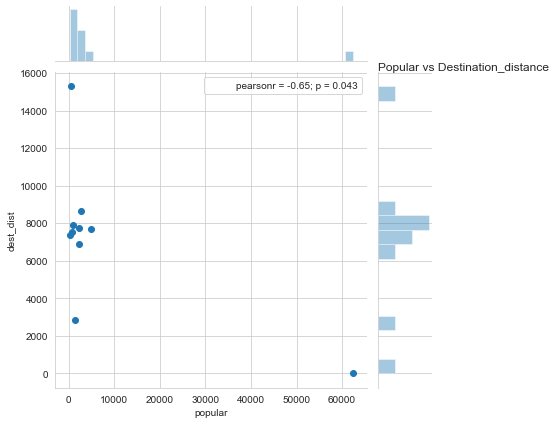

In [32]:
#seaborn.jointplot(x, y, data=None, kind='scatter', stat_func=None, color=None, height=6, ratio=5, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None, **kwargs)
#Draw a plot of two variables with bivariate and univariate graphs.
#This function provides a convenient interface to the JointGrid class, with several canned plot kinds. This is intended to be a fairly lightweight wrapper; if you need more flexibility, you should use JointGrid directly.
#Read more - link-https://seaborn.pydata.org/generated/seaborn.jointplot.html
j = sns.jointplot(x='popular',y='dest_dist',data=df_distplot)
j.annotate(stats.pearsonr)
plt.title('Popular vs Destination_distance',pad=2.0,loc='left')
plt.show()

The correlation coefficient here is -ve which shows people tend to choose US i.e their home country than travel abroad i.e many travelers don't want to go far off.

C:\Users\user\Anaconda3\envs\tf-gpu\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


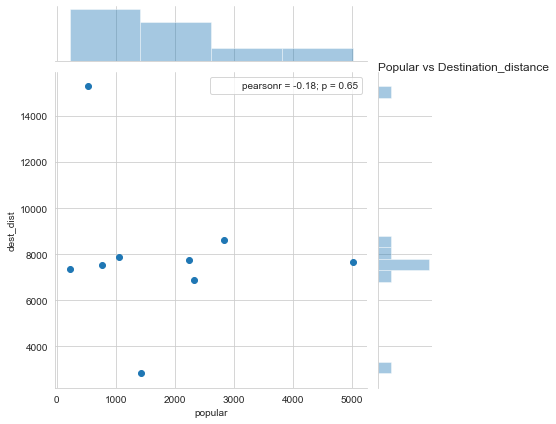

In [33]:
#seaborn.jointplot(x, y, data=None, kind='scatter', stat_func=None, color=None, height=6, ratio=5, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None, **kwargs)
#Draw a plot of two variables with bivariate and univariate graphs.
#This function provides a convenient interface to the JointGrid class, with several canned plot kinds. This is intended to be a fairly lightweight wrapper; if you need more flexibility, you should use JointGrid directly.
#Read more - link-https://seaborn.pydata.org/generated/seaborn.jointplot.html
j = sns.jointplot(x='popular',y='dest_dist',data=df_distplot.drop('US'))
j.annotate(stats.pearsonr)
plt.title('Popular vs Destination_distance',pad=2.0,loc='left')
plt.show()

The correlation value has improved but still the users heavily travel close to their country of origin

C:\Users\user\Anaconda3\envs\tf-gpu\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


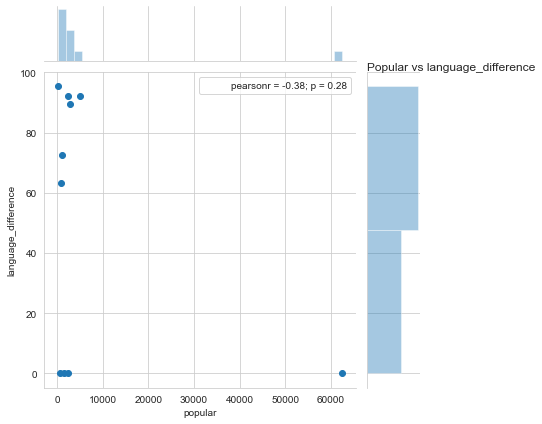

In [34]:
#seaborn.jointplot(x, y, data=None, kind='scatter', stat_func=None, color=None, height=6, ratio=5, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None, **kwargs)
#Draw a plot of two variables with bivariate and univariate graphs.
#This function provides a convenient interface to the JointGrid class, with several canned plot kinds. This is intended to be a fairly lightweight wrapper; if you need more flexibility, you should use JointGrid directly.
#Read more - link-https://seaborn.pydata.org/generated/seaborn.jointplot.html
j = sns.jointplot(x='popular',y='language_difference',data=df_distplot)
j.annotate(stats.pearsonr)
plt.title('Popular vs language_difference',pad=2.0,loc='left')
plt.show()

C:\Users\user\Anaconda3\envs\tf-gpu\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


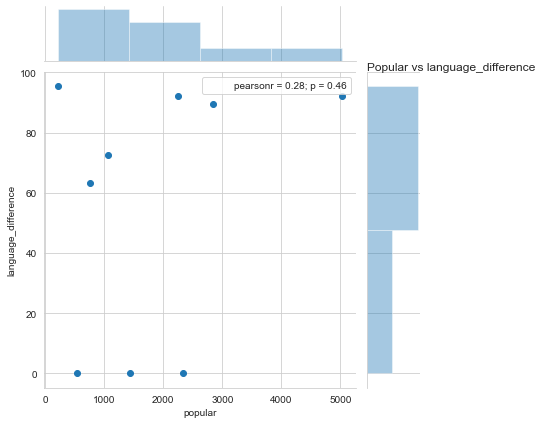

In [35]:
#seaborn.jointplot(x, y, data=None, kind='scatter', stat_func=None, color=None, height=6, ratio=5, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None, **kwargs)
#Draw a plot of two variables with bivariate and univariate graphs.
#This function provides a convenient interface to the JointGrid class, with several canned plot kinds. This is intended to be a fairly lightweight wrapper; if you need more flexibility, you should use JointGrid directly.
#Read more - link-https://seaborn.pydata.org/generated/seaborn.jointplot.html
j = sns.jointplot(x='popular',y='language_difference',data=df_distplot.drop('US'))
j.annotate(stats.pearsonr)
plt.title('Popular vs language_difference',pad=2.0,loc='left')
plt.show()

The above two graphs show the correlation between difference of the language of the destination country and the language of the source country(English). If we remove US as the destination people tend to prefer non english speaking countries

C:\Users\user\Anaconda3\envs\tf-gpu\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


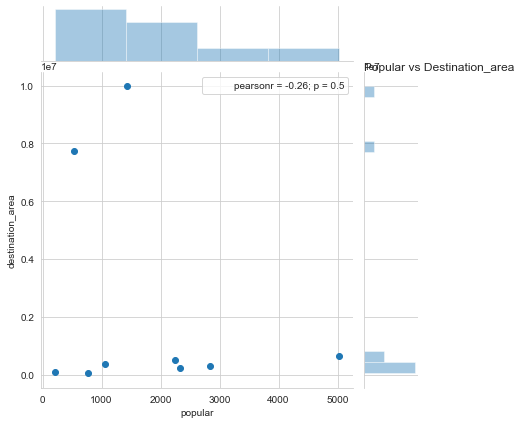

In [38]:
#seaborn.jointplot(x, y, data=None, kind='scatter', stat_func=None, color=None, height=6, ratio=5, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None, **kwargs)
#Draw a plot of two variables with bivariate and univariate graphs.
#This function provides a convenient interface to the JointGrid class, with several canned plot kinds. This is intended to be a fairly lightweight wrapper; if you need more flexibility, you should use JointGrid directly.
#Read more - link-https://seaborn.pydata.org/generated/seaborn.jointplot.html
j = sns.jointplot(x='popular',y='destination_area',data=df_distplot.drop('US'))
j.annotate(stats.pearsonr)
plt.title('Popular vs Destination_area',pad=2.0,loc='left')
plt.show()

There is a negative correlation here which means people tend to prefer smaller countries and most of the european countries are smaller in size than than non US english speaking countries.

## EDA OF Train and Test Users

In [39]:
print(df_train.head())
print(df_train.shape)

           id date_account_created  timestamp_first_active date_first_booking  \
0  gxn3p5htnn           2010-06-28          20090319043255                NaN   
1  820tgsjxq7           2011-05-25          20090523174809                NaN   
2  4ft3gnwmtx           2010-09-28          20090609231247         2010-08-02   
3  bjjt8pjhuk           2011-12-05          20091031060129         2012-09-08   
4  87mebub9p4           2010-09-14          20091208061105         2010-02-18   

      gender   age signup_method  signup_flow language affiliate_channel  \
0  -unknown-   NaN      facebook            0       en            direct   
1       MALE  38.0      facebook            0       en               seo   
2     FEMALE  56.0         basic            3       en            direct   
3     FEMALE  42.0      facebook            0       en            direct   
4  -unknown-  41.0         basic            0       en            direct   

  affiliate_provider first_affiliate_tracked signup_app 

In [40]:
df_test = pd.read_csv('test_users.csv/test_users.csv')

In [41]:
# displaying the unique values of the feature column'date_first_booking'
df_test['date_first_booking'].unique()

array([nan])

<b> from the above analysis we come to the conclusion that the column date_first_booking doesn't add much value so we can drop it as the test set doesn't have it.

In [42]:
#droping the column'date_first_booking'
df_train.drop('date_first_booking',axis=1,inplace=True)

In [43]:
df_train.head(10)

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [44]:

#Series.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)[source]
#Return a Series containing counts of unique values.
#link-https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html#:~:text=Return%20a%20Series%20containing%20counts,Excludes%20NA%20values%20by%20default.
df_train['country_destination'].value_counts()df_train['country_destination'].value_counts()

NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64

In [45]:
#checking the null values
df_train.isnull().sum()

id                             0
date_account_created           0
timestamp_first_active         0
gender                         0
age                        87990
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked     6065
signup_app                     0
first_device_type              0
first_browser                  0
country_destination            0
dtype: int64

In [46]:
# displaying the unique values of the gender column
df_train['gender'].unique()

array(['-unknown-', 'MALE', 'FEMALE', 'OTHER'], dtype=object)

In [47]:
#displaying the unique values of the country_destination column
df_train['country_destination'].unique()

array(['NDF', 'US', 'other', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL',
       'DE', 'AU'], dtype=object)

In [48]:
# displaying the unique values of the first_browser column
df_train['first_browser'].unique()

array(['Chrome', 'IE', 'Firefox', 'Safari', '-unknown-', 'Mobile Safari',
       'Chrome Mobile', 'RockMelt', 'Chromium', 'Android Browser',
       'AOL Explorer', 'Palm Pre web browser', 'Mobile Firefox', 'Opera',
       'TenFourFox', 'IE Mobile', 'Apple Mail', 'Silk', 'Camino', 'Arora',
       'BlackBerry Browser', 'SeaMonkey', 'Iron', 'Sogou Explorer',
       'IceWeasel', 'Opera Mini', 'SiteKiosk', 'Maxthon',
       'Kindle Browser', 'CoolNovo', 'Conkeror', 'wOSBrowser',
       'Google Earth', 'Crazy Browser', 'Mozilla', 'OmniWeb',
       'PS Vita browser', 'NetNewsWire', 'CometBird', 'Comodo Dragon',
       'Flock', 'Pale Moon', 'Avant Browser', 'Opera Mobile',
       'Yandex.Browser', 'TheWorld Browser', 'SlimBrowser', 'Epic',
       'Stainless', 'Googlebot', 'Outlook 2007', 'IceDragon'],
      dtype=object)

In [49]:
#Replacing the unkonwn variable with the nan value.
df_train.first_browser.replace("-unknown-",np.nan, inplace=True)
df_train.gender.replace("-unknown-", np.nan, inplace=True)

In [50]:
#Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values. 
#link -https://www.geeksforgeeks.org/python-pandas-dataframe-describe-method/
df_train.gender.describe()

count     117763
unique         3
top       FEMALE
freq       63041
Name: gender, dtype: object

In [51]:
#Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values. 
#link -https://www.geeksforgeeks.org/python-pandas-dataframe-describe-method/
df_train.age.describe()

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

In [53]:
#Pandas DataFrame.loc attribute access a group of rows and columns by label(s) or a boolean array in the given DataFrame.
#link-https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html
df_train.loc[df_train['age']>1000]['age'].describe()

count     779.000000
mean     2011.097561
std        14.718288
min      1924.000000
25%      2014.000000
50%      2014.000000
75%      2014.000000
max      2014.000000
Name: age, dtype: float64

In [54]:
# since the age has very high values of 1000+ and other values which are very high form we use the apply function of the data frame link:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html,
# to reduce the maximum age which other wise looked like a typo error.
# In the apply function we are using lambda function to perform our calculation to save space link- https://www.w3schools.com/python/python_lambda.asp
df_train['age'] = df_train['age'].apply(lambda x: 2015 - x if x >1000 else x)

In [55]:
#Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values. 
#link -https://www.geeksforgeeks.org/python-pandas-dataframe-describe-method/
df_train.age.describe()

count    125461.000000
mean         37.205458
std          14.209255
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max         150.000000
Name: age, dtype: float64

In [56]:
#Pandas DataFrame.loc attribute access a group of rows and columns by label(s) or a boolean array in the given DataFrame.
#link-https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html
df_train.loc[df_train['age']<18]['age'].describe()

count    908.000000
mean       2.998899
std        4.899317
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max       17.000000
Name: age, dtype: float64

In [57]:
#Pandas DataFrame.loc attribute access a group of rows and columns by label(s) or a boolean array in the given DataFrame.
#link-https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html

#Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values. 
#link -https://www.geeksforgeeks.org/python-pandas-dataframe-describe-method/
df_train.loc[df_train['age']>1000]['age'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: age, dtype: float64

In [58]:
# Here we are trying to clip off the ages below 18 and above 100 as they don't seem to be the age groups travelling much alone.
df_train['age'] = df_train['age'].apply(lambda x: np.nan if (x >100 and x<18) else x)

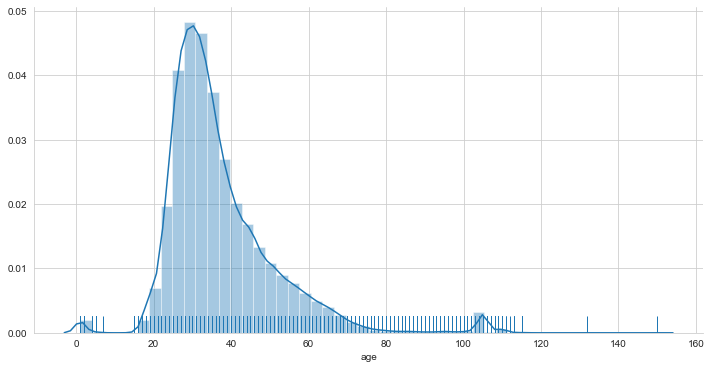

In [59]:
#seaborn.distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)
#Flexibly plot a univariate distribution of observations
#link- https://seaborn.pydata.org/generated/seaborn.distplot.html
plt.figure(figsize=(12,6))
sns.distplot(df_train.age.dropna(),rug=True)
sns.despine()
plt.show()

<b> from the above graph it is clearly visible that majority of the users are in the age group of 20-40

## User's gender

In [29]:
#Replacing the unkonwn variable with the nan value.
df_train.gender.replace("-unknown-", np.nan, inplace=True)

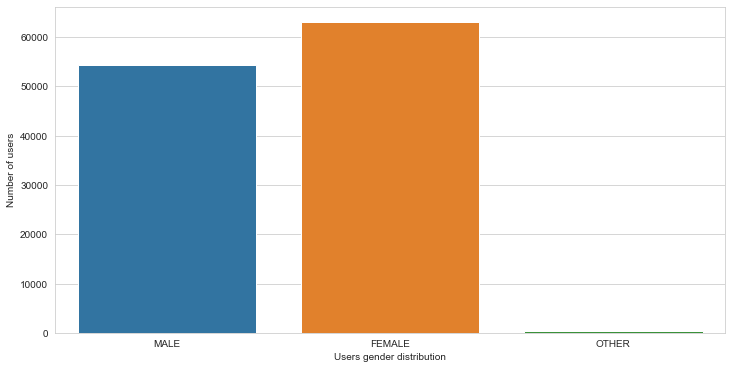

In [60]:
#seaborn.countplot() method is used to Show the counts of observations in each categorical bin using bars.
#https://seaborn.pydata.org/generated/seaborn.countplot.html
plt.figure(figsize=(12,6))
sns.countplot(x='gender',data=df_train)
plt.ylabel('Number of users')
plt.xlabel('Users gender distribution')
plt.show()

<b> The female count is a bit more than male but not by much

## Travel Destination

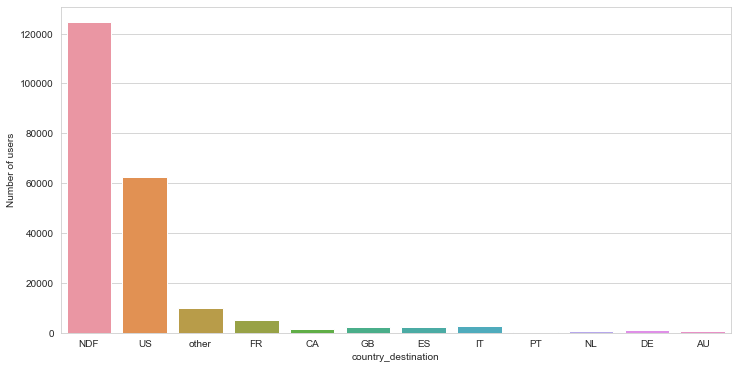

In [61]:
#seaborn.countplot() method is used to Show the counts of observations in each categorical bin using bars.
#https://seaborn.pydata.org/generated/seaborn.countplot.html
plt.figure(figsize=(12,6))
sns.countplot(x='country_destination',data=df_train)
plt.ylabel('Number of users')
plt.xlabel('country_destination')
plt.show()

<b>Number of users who did not end up booking any trip is the maximum, the most popular destination which was choosen is US.

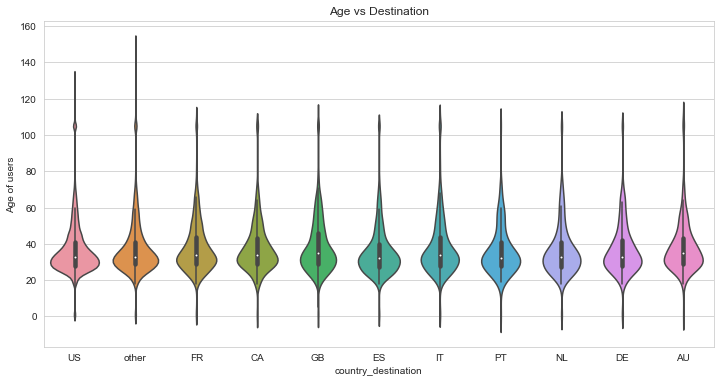

In [62]:
#Violin Plot is a method to visualize the distribution of numerical data of different variables. It is similar to Box Plot but with a rotated plot on each side, giving more information about the density estimate on the y-axis.
#The density is mirrored and flipped over and the resulting shape is filled in, creating an image resembling a violin. The advantage of a violin plot is that it can show nuances in the distribution that aren’t perceptible in a boxplot.
#link -https://www.geeksforgeeks.org/violin-plot-for-data-analysis/
plt.figure(figsize=(12,6))
df_withoutNDF = df_train[df_train['country_destination'] != 'NDF']
sns.violinplot(x='country_destination',y='age',data=df_withoutNDF)
plt.xlabel('country_destination')
plt.ylabel('Age of users')
plt.title('Age vs Destination')
plt.show()

<b>The age difference is not that much when we look at the destinations that are booked, they are pretty evenly spread out.

<Figure size 864x432 with 0 Axes>

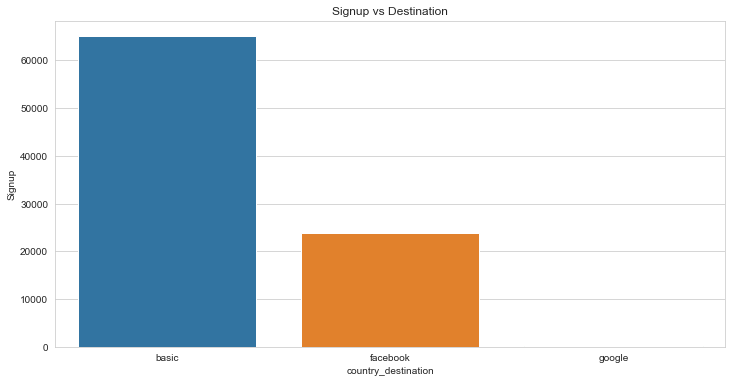

In [63]:
#seaborn.countplot() method is used to Show the counts of observations in each categorical bin using bars.
#https://seaborn.pydata.org/generated/seaborn.countplot.html

plt.figure(figsize=(12,6))
plt.figure(figsize=(12,6))
df_withoutNDF = df_train[df_train['country_destination'] != 'NDF']
sns.countplot(x='signup_method',data=df_withoutNDF)
plt.xlabel('country_destination')
plt.ylabel('Signup')
plt.title('Signup vs Destination')
plt.show()


<b>Basic method is the most common method of booking atleast once.

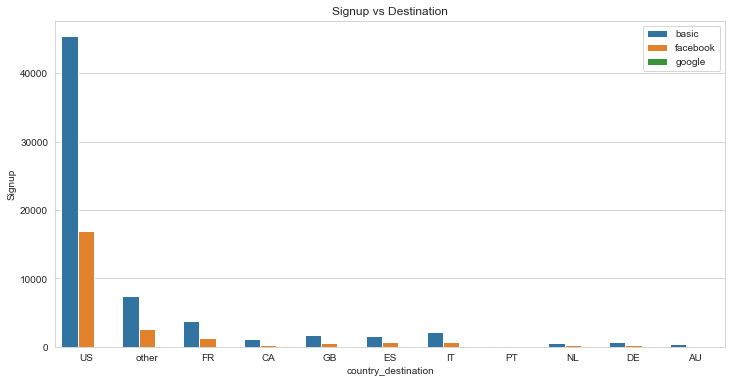

In [64]:
#seaborn.countplot() method is used to Show the counts of observations in each categorical bin using bars.
#https://seaborn.pydata.org/generated/seaborn.countplot.html
plt.figure(figsize=(12,6))
df_withoutNDF = df_train[df_train['country_destination'] != 'NDF']
sns.countplot(x='country_destination',data=df_withoutNDF,hue='signup_method')
plt.xlabel('country_destination')
plt.ylabel('Signup')
plt.title('Signup vs Destination')
plt.legend(loc='upper right')
plt.show()

<b>In the above graph we come to a conclusion that the basic email is the most preferred choice of logging into airbnb to book destination

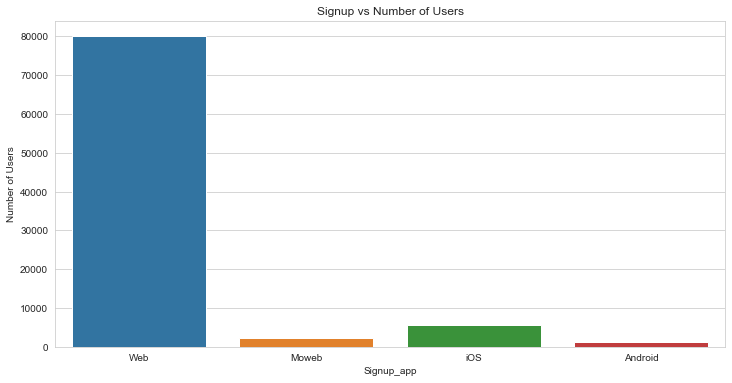

In [65]:
#seaborn.countplot() method is used to Show the counts of observations in each categorical bin using bars.
#https://seaborn.pydata.org/generated/seaborn.countplot.html
plt.figure(figsize=(12,6))
df_withoutNDF = df_train[df_train['country_destination'] != 'NDF']
sns.countplot(x='signup_app',data=df_withoutNDF)
plt.xlabel('Signup_app')
plt.ylabel('Number of Users')
plt.title('Signup vs Number of Users')
plt.show()

<b>The most preferred way for a user to book is throught the web then followed by using an iOS device.

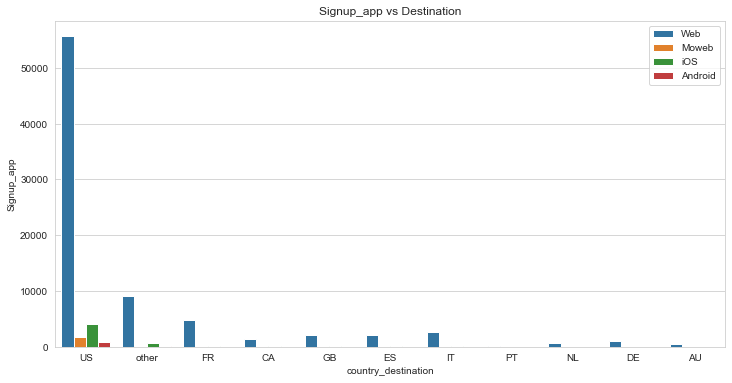

In [66]:
#seaborn.countplot() method is used to Show the counts of observations in each categorical bin using bars.
#https://seaborn.pydata.org/generated/seaborn.countplot.html
plt.figure(figsize=(12,6))
df_withoutNDF = df_train[df_train['country_destination'] != 'NDF']
sns.countplot(x='country_destination',data=df_withoutNDF,hue='signup_app')
plt.xlabel('country_destination')
plt.ylabel('Signup_app')
plt.title('Signup_app vs Destination')
plt.legend(loc='upper right')
plt.show()

<b>It is clear from the above graph that the users in USA have shown some variation in booking through the app but have majorly used the web to make bookings. The other countries use the web as the only source of booking.

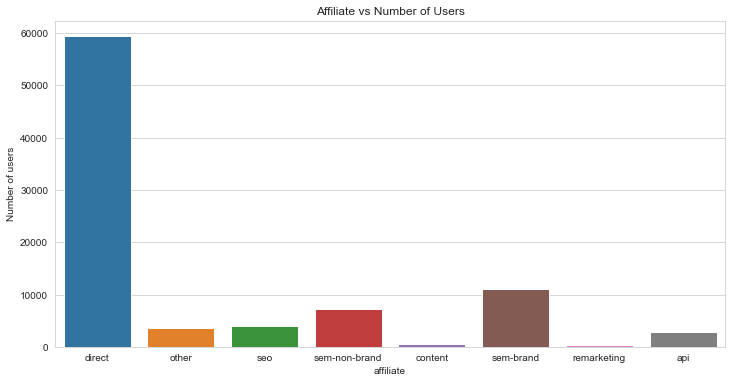

In [67]:
#seaborn.countplot() method is used to Show the counts of observations in each categorical bin using bars.
#https://seaborn.pydata.org/generated/seaborn.countplot.html
plt.figure(figsize=(12,6))
df_withoutNDF = df_train[df_train['country_destination'] != 'NDF']
sns.countplot(x='affiliate_channel',data=df_withoutNDF)
plt.xlabel('affiliate')
plt.ylabel('Number of users')
plt.title('Affiliate vs Number of Users')
plt.show()

<b>Majority of the users come directly to the web site although some come through the other ads and other channels but the difference is huge.

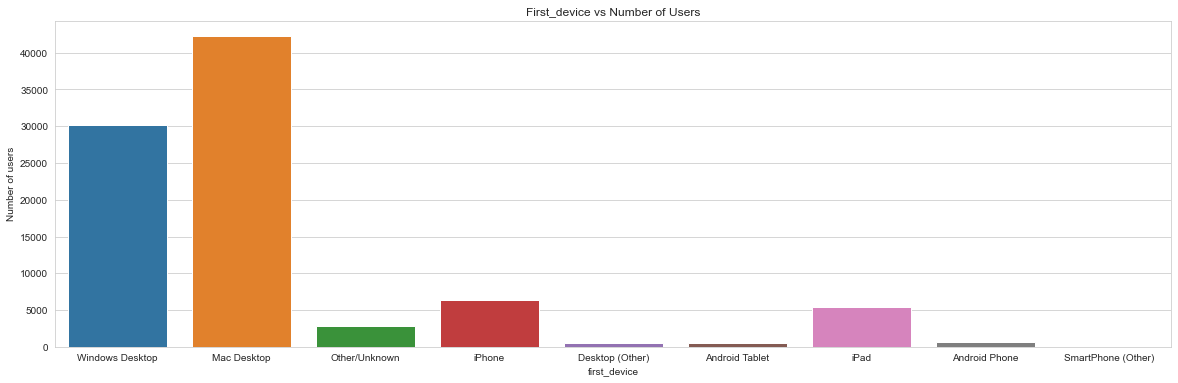

In [68]:
#seaborn.countplot() method is used to Show the counts of observations in each categorical bin using bars.
#https://seaborn.pydata.org/generated/seaborn.countplot.html
plt.figure(figsize=(20,6))
df_withoutNDF = df_train[df_train['country_destination'] != 'NDF']
sns.countplot(x='first_device_type',data=df_withoutNDF)
plt.xlabel('first_device')
plt.ylabel('Number of users')
plt.title('First_device vs Number of Users')
plt.show()

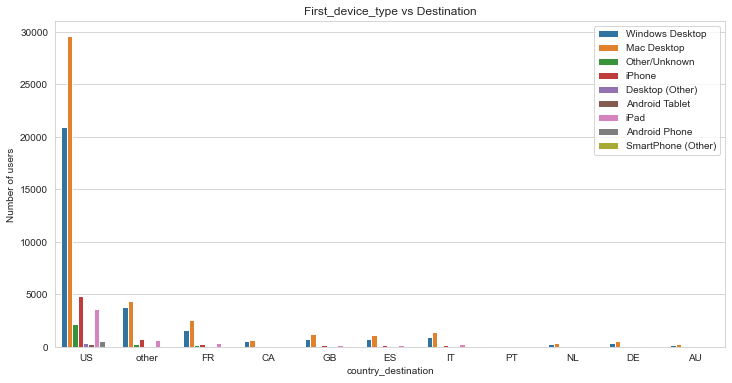

In [69]:
#seaborn.countplot() method is used to Show the counts of observations in each categorical bin using bars.
#https://seaborn.pydata.org/generated/seaborn.countplot.html
plt.figure(figsize=(12,6))
df_withoutNDF = df_train[df_train['country_destination'] != 'NDF']
sns.countplot(x='country_destination',data=df_withoutNDF,hue='first_device_type')
plt.xlabel('country_destination')
plt.ylabel('Number of users')
plt.title('First_device_type vs Destination')
plt.legend(loc='upper right')
plt.show()

<b>The above two graphs show that Apple devices are primaraly the most common devices used by the users to book their travel destination wether it is in the US or anyother country

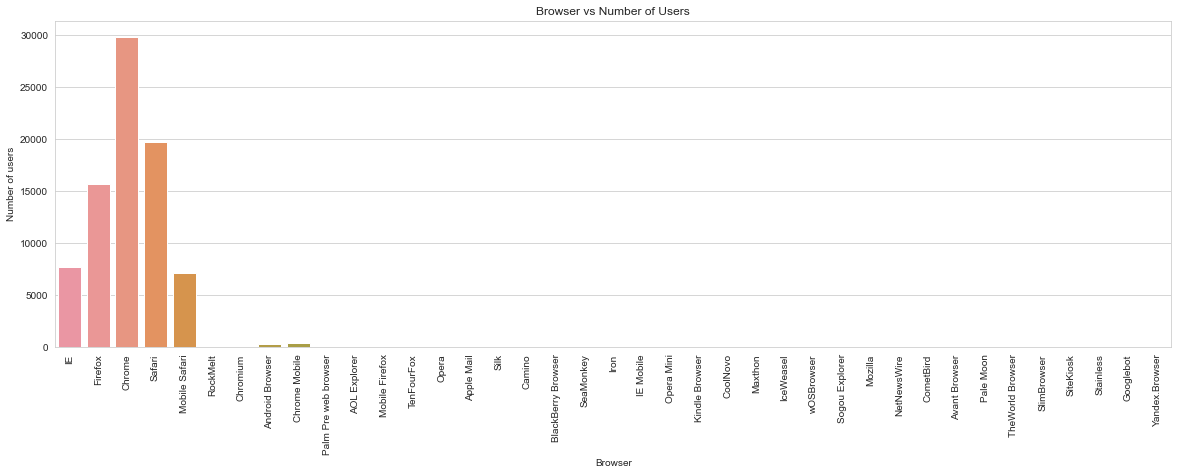

In [70]:
#seaborn.countplot() method is used to Show the counts of observations in each categorical bin using bars.
#https://seaborn.pydata.org/generated/seaborn.countplot.html
plt.figure(figsize=(20,6))
df_withoutNDF = df_train[df_train['country_destination'] != 'NDF']
sns.countplot(x='first_browser',data=df_withoutNDF)
plt.xlabel('Browser')
plt.ylabel('Number of users')
plt.title('Browser vs Number of Users')
plt.xticks(rotation=90)
plt.show()

<b>Chrome is the most popular browser used to access the website

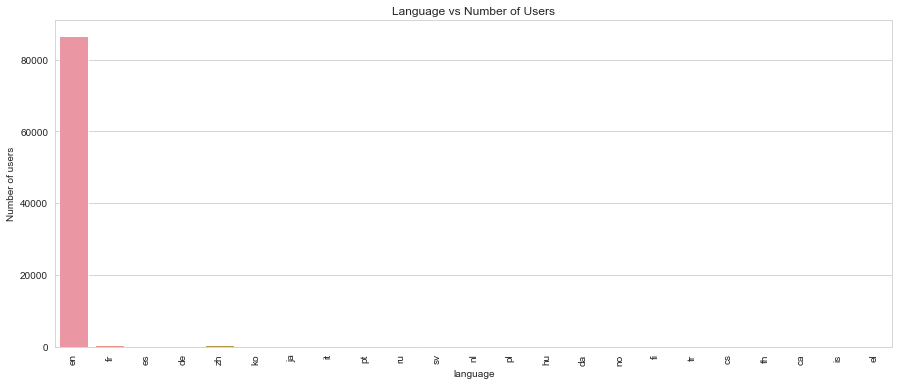

In [71]:
#seaborn.countplot() method is used to Show the counts of observations in each categorical bin using bars.
#https://seaborn.pydata.org/generated/seaborn.countplot.html
plt.figure(figsize=(15,6))
df_withoutNDF = df_train[df_train['country_destination'] != 'NDF']
sns.countplot(x='language',data=df_withoutNDF)
plt.xlabel('language')
plt.ylabel('Number of users')
plt.title('Language vs Number of Users')
plt.xticks(rotation=90)
plt.show()

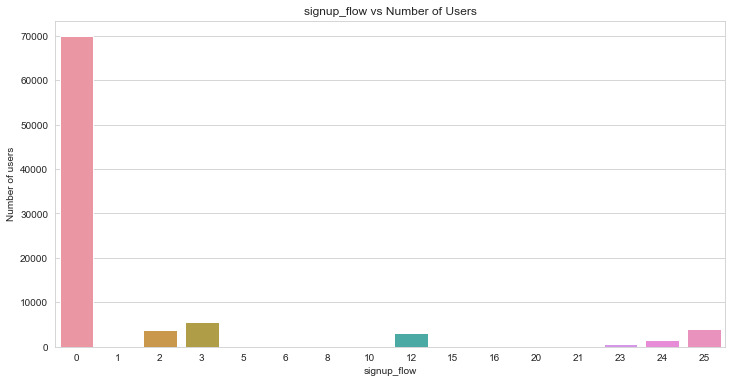

In [72]:
#seaborn.countplot() method is used to Show the counts of observations in each categorical bin using bars.
#https://seaborn.pydata.org/generated/seaborn.countplot.html
plt.figure(figsize=(12,6))
df_withoutNDF = df_train[df_train['country_destination'] != 'NDF']
sns.countplot(x='signup_flow',data=df_withoutNDF)
plt.xlabel('signup_flow')
plt.ylabel('Number of users')
plt.title('signup_flow vs Number of Users')

plt.show()

In [73]:
#Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values. 
#link -https://www.geeksforgeeks.org/python-pandas-dataframe-describe-method/
df_train['signup_flow'].describe()

count    213451.000000
mean          3.267387
std           7.637707
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          25.000000
Name: signup_flow, dtype: float64

<b>English is the most popluar language.

## Dates
    - We will visualize how the users will be booking across the year which months there are more bookings etc.

In [74]:
# this shows all the columns present in the dataframe
df_withoutNDF.columns

Index(['id', 'date_account_created', 'timestamp_first_active', 'gender', 'age',
       'signup_method', 'signup_flow', 'language', 'affiliate_channel',
       'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
       'first_device_type', 'first_browser', 'country_destination'],
      dtype='object')

In [75]:
#Pandas DataFrame.loc attribute access a group of rows and columns by label(s) or a boolean array in the given DataFrame.
#link-https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html.
# in this cell we are converting the timestamp value in the correct datatime format
# link- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
import pandas as pd
result = df_withoutNDF.loc[:,'timestamp_first_active']
result =  pd.to_datetime(result, infer_datetime_format=True)

In [76]:
df_withoutNDF.head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
2,4ft3gnwmtx,2010-09-28,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,NaN,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US


C:\Users\user\Anaconda3\envs\tf-gpu\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


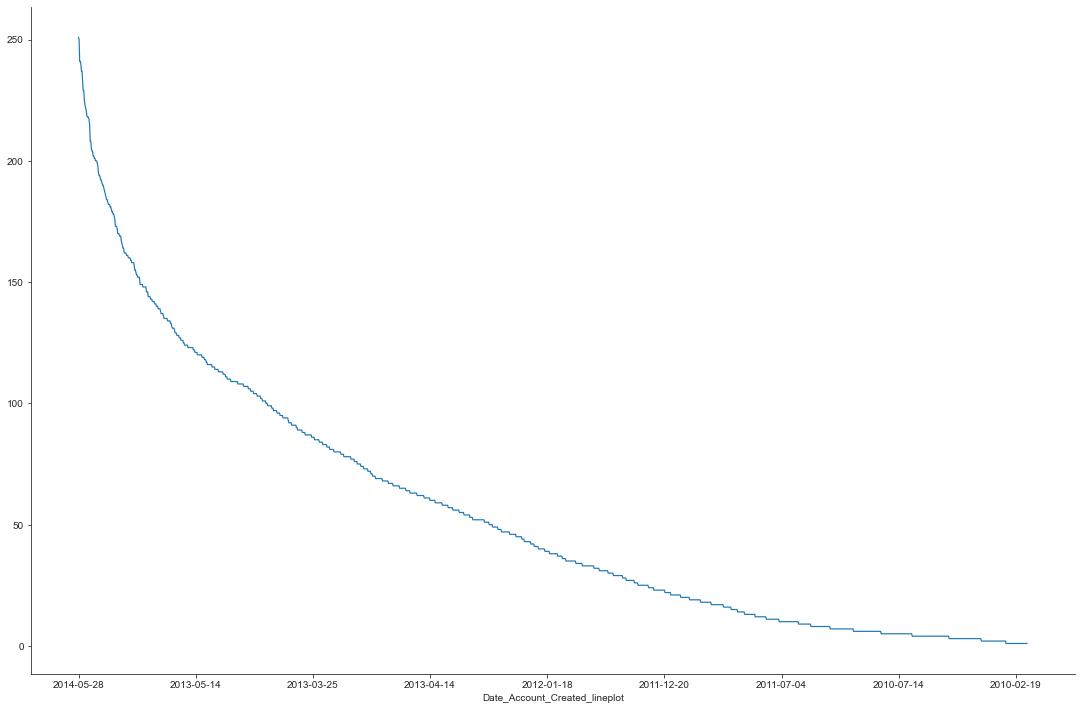

In [77]:
sns.set_style('ticks')
fig,ax = plt.subplots()
fig.set_size_inches(18.7,12.27)
df_withoutNDF.date_account_created.value_counts().plot(kind='line',linewidth=1.2)
plt.xlabel('Date_Account_Created_lineplot')
sns.despine()


The user growth has taken up sharply after 2013

## Users's Session Data

In [78]:
session = pd.read_csv("sessions.csv/sessions.csv")

In [79]:
session.columns

Index(['user_id', 'action', 'action_type', 'action_detail', 'device_type',
       'secs_elapsed'],
      dtype='object')

In [80]:
print("The number of unique session ids are:",len(session.user_id.unique()))

The number of unique session ids are: 135484


In [81]:
#Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values. 
#link -https://www.geeksforgeeks.org/python-pandas-dataframe-describe-method/

session.action_type.describe()

count     9441533
unique         10
top          view
freq      3560902
Name: action_type, dtype: object

In [82]:
#Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values. 
#link -https://www.geeksforgeeks.org/python-pandas-dataframe-describe-method/
session.action.describe()

count     10488111
unique         359
top           show
freq       2768278
Name: action, dtype: object

In [83]:
#Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values. 
#link -https://www.geeksforgeeks.org/python-pandas-dataframe-describe-method/
session.action_detail.describe()

count                 9441533
unique                    155
top       view_search_results
freq                  1776885
Name: action_detail, dtype: object

In [84]:
#Series.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)[source]
#Return a Series containing counts of unique values.
#link-https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html#:~:text=Return%20a%20Series%20containing%20counts,Excludes%20NA%20values%20by%20default.
df_train['country_destination'].value_counts()
session.action_detail.value_counts().head(10)

view_search_results            1776885
p3                             1376550
-unknown-                      1031141
wishlist_content_update         706824
user_profile                    656839
change_trip_characteristics     487744
similar_listings                364624
user_social_connections         336799
update_listing                  269779
listing_reviews                 269021
Name: action_detail, dtype: int64

In [85]:
#Series.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)[source]
#Return a Series containing counts of unique values.
#link-https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html#:~:text=Return%20a%20Series%20containing%20counts,Excludes%20NA%20values%20by%20default.
df_train['country_destination'].value_counts()
session.action.value_counts().head(5)

show              2768278
index              843699
search_results     725226
personalize        706824
search             536057
Name: action, dtype: int64

The most popular action amongst the users is browsing i.e show and the remaining values are kind of similar.

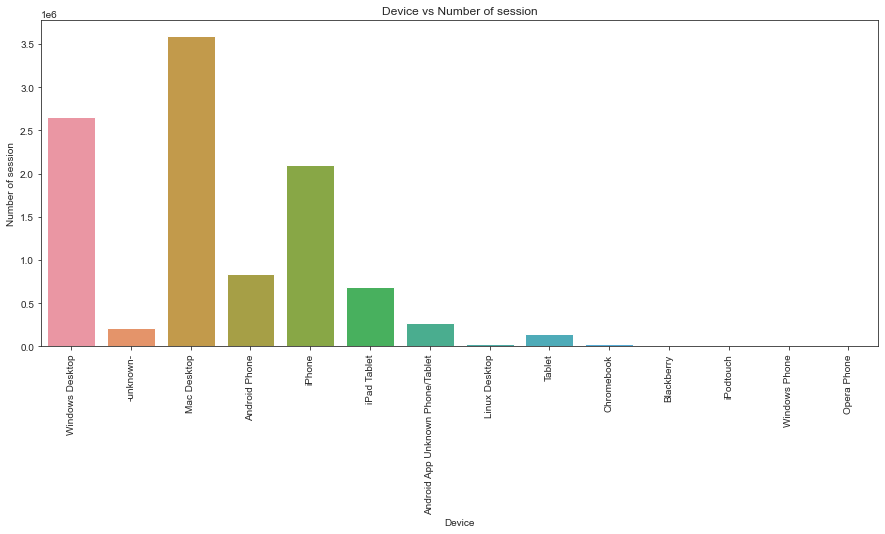

In [86]:
#seaborn.countplot() method is used to Show the counts of observations in each categorical bin using bars.
#https://seaborn.pydata.org/generated/seaborn.countplot.html
plt.figure(figsize=(15,6))
sns.countplot(x='device_type',data=session)
plt.xlabel('Device')
plt.ylabel('Number of session')
plt.title('Device vs Number of session')
plt.xticks(rotation=90)
plt.show()

As seen from the train and test set EDA it is here from the session data analysis too confirmed that Mac Desktop is most preferred tool to access Airbnb